<a href="https://colab.research.google.com/github/petermr/semanticClimate/blob/main/outreach/climate_knowledge_hunt_hackathon/Hackathon_Notebook/climate_hackathon_chapter08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install packages
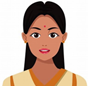
**Click the button and machine will do the job for you.... This might take a minute or two...**


---
<hr height=3>

In [ ]:
#installing the tools
!git clone  https://github.com/petermr/semanticClimate.git
!pip install -r /content/semanticClimate/keyword_extraction/code/requirement.txt
!pip install docanalysis
!pip install py4ami==0.0.35
!python -m spacy download en_core_web_lg
import nltk
nltk.download('stopwords')

## Conversion ---> pdf to html

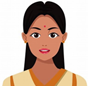
**In order to unlock a pdf into an HTML, you just have to click on the cell run below...Machine will do all the computation on your behalf...**

In [1]:
import os
import shutil
chapter_no ='Chapter08'
saving_path_html = f'/content/Pdf_to_html_{chapter_no}/'
if not os.path.exists(saving_path_html+'final/'):
  os.makedirs(saving_path_html+'final/')
if not os.path.exists(saving_path_html+'temp/'):
  os.makedirs(saving_path_html+'temp/')  


In [ ]:
# pdf to html conversion
!py4ami PDF\
--inpath '/content/semanticClimate/ipcc/ar6/wg3/Chapter08/fulltext.pdf'\
--outpath '/content/Pdf_to_html_Chapter08/final/fulltext.html'\
--outdir  '/content/Pdf_to_html_Chapter08/temp/'\
--pages 1_11

## Abbreviations extraction

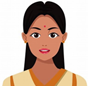
**To extract abbreviation, just run the cell below and the machine will do all the computation on your behalf...**

In [ ]:
#making directory to store and obtain the dictionaries 
saving_path = f'/content/wiki_hack/{chapter_no}/sections/0_mainbody/'
if not os.path.exists(saving_path):
  os.makedirs(saving_path)
shutil.copy(f'/content/semanticClimate/ipcc/ar6/wg3/{chapter_no}/fulltext.html',f'/content/wiki_hack/{chapter_no}/sections/0_mainbody')


In [ ]:
#abbreviation extraction --automated abbreviation using docanalysis
!docanalysis --project_name '/content/wiki_hack' --output 'entities.csv' --make_ami_dict 'entities.xml'
# structuring the dictionary
!docanalysis --project_name '/content/wiki_hack'\
--output 'Indexing.csv' --make_json 'Indexing.json'\
--make_ami_dict 'entities' --extract_abb 'abb_chapter08'

##Keywords/ Key-Phrases Extraction




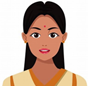
**To get keywords and key-phrases extracted run teh cell below...Machine will do all the computation on your behalf...**

In [ ]:
# keyword/ phrases extraction
!python /content/semanticClimate/keyword_extraction/code/keyword_extraction.py \
--html_path /content/semanticClimate/ipcc/ar6/wg3/Chapter08/fulltext.html \
--saving_path /content/ \
--method 'gensim'

## WordCloud Generation

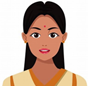
**WordCloud generation easy, just run the cell below ...Machine will do all the computation on your behalf...**

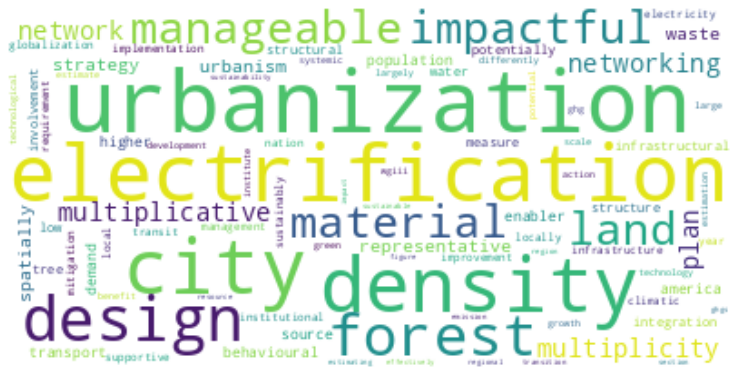

In [8]:
# WordCloud Generation
%run /content/semanticClimate/wordCloud_Generation/SemanticClimate_wordcloud.py\
--file_path '/content/semanticClimate/wordCloud_Generation/'\
--saving_path '/content/'\
--Chapter_name 'Chapter08'

##HTML Markup
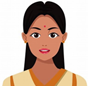
**To Marup the HTML please click on the cell bellow...Machine will do all the computation on your behalf...**

In [ ]:
# HTM markup using abbreviation dictionary + manual dictionary + keyword/phrases 
!py4ami HTML --annotate\
--dict /content/wiki_hack/abb_chapter08.xml\
--inpath /content/semanticClimate/ipcc/ar6/wg3/Chapter08/fulltext.html\
--outpath /content/annotated_fulltext_Chapter08.html\
--color YELLOW